In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

**problem statement**


**The Air Quality Index (AQI) is used for reporting daily air quality. It tells you how clean or polluted your air is.The dataset contains air quality data and AQI (Air Quality Index)at hourly and daily level of various stations across multiple cities in India.**

In [3]:
df=pd.read_csv("/content/city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


# Understand the data



- City: Name of the city.
- Date: Date of the observation.
- PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3: Various air quality measurements.
- Benzene, Toluene, Xylene: Concentrations of specific pollutants.
- AQI: Air Quality Index, a summary indicator of air quality.
- AQI_Bucket: A categorical label for air quality (e.g., "Good", "Moderate").



The Air Quality Index (AQI) is a standardized indicator used to communicate how polluted the air currently is or how polluted it is forecasted to become. It simplifies complex air quality data into a single number, color, or descriptive category to help the public understand the potential health implications.

In [4]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [6]:
df.shape

(29531, 16)

In [7]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [9]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


# **Visualization**

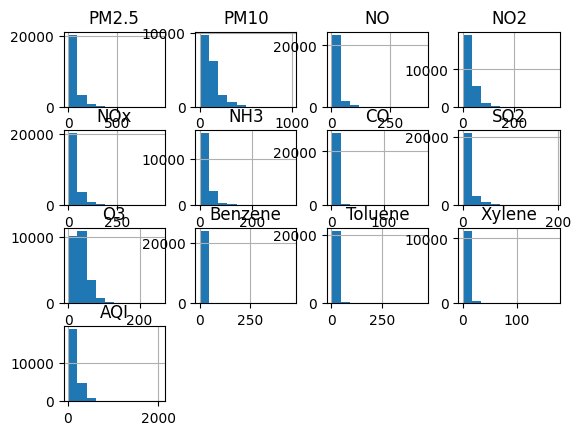

In [10]:
df.hist()
plt.show()

<Axes: >

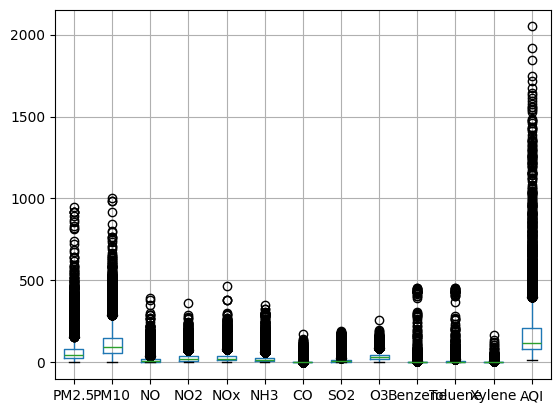

In [11]:
df.boxplot()

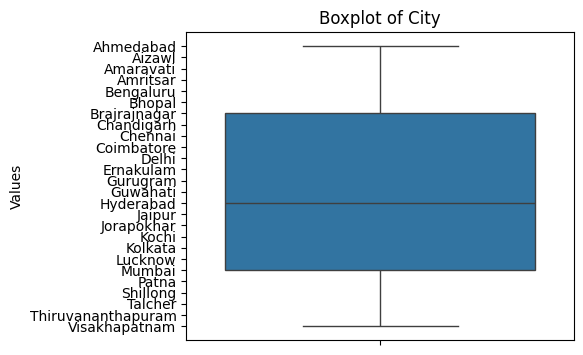

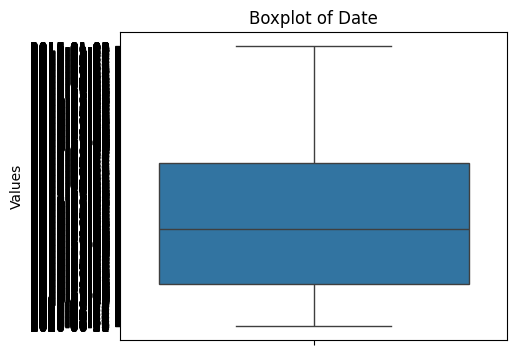

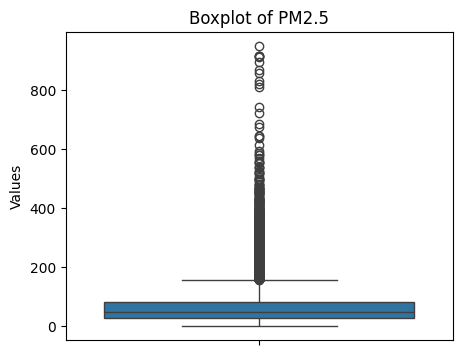

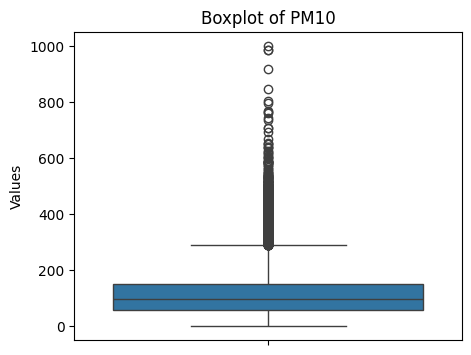

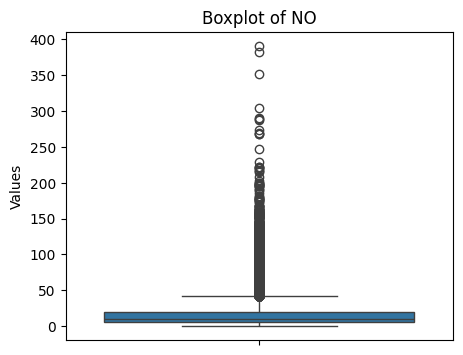

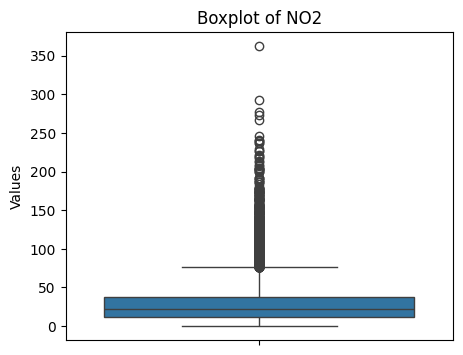

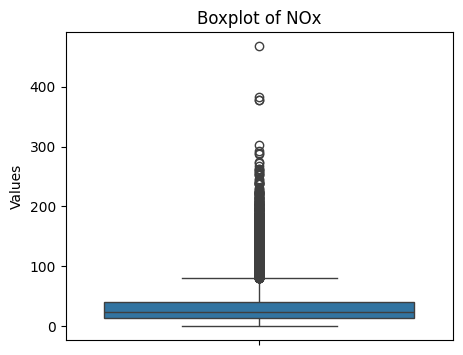

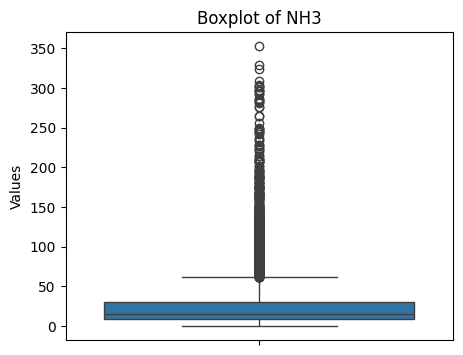

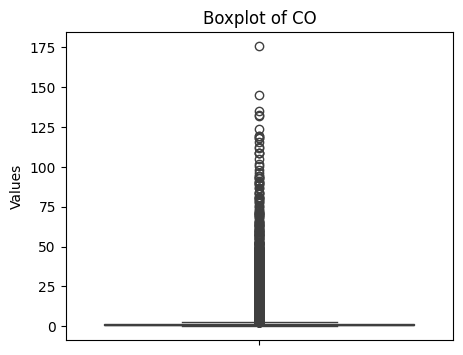

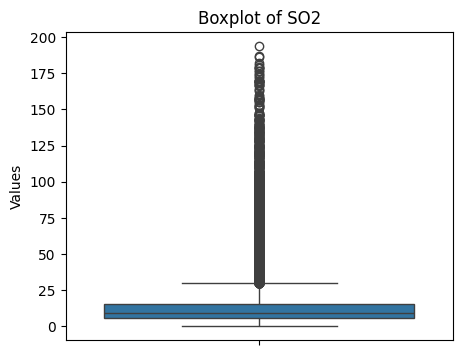

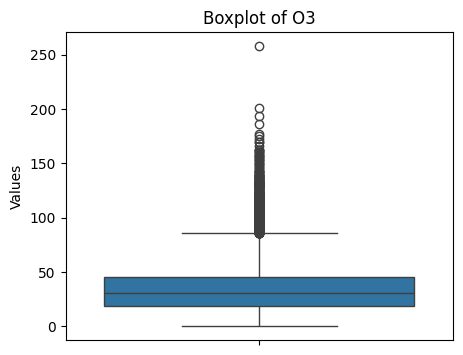

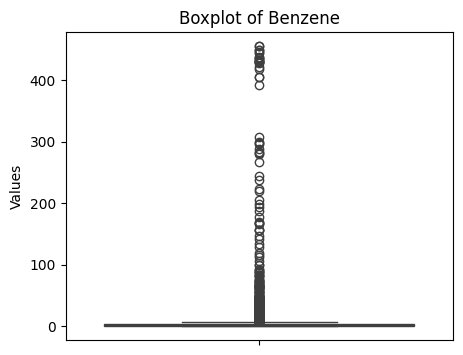

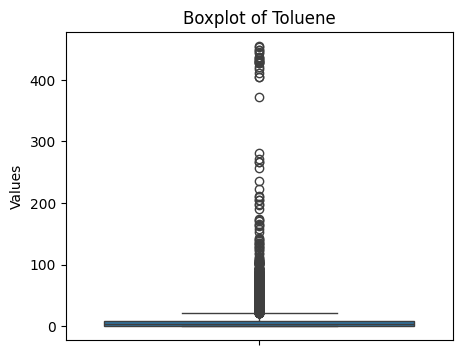

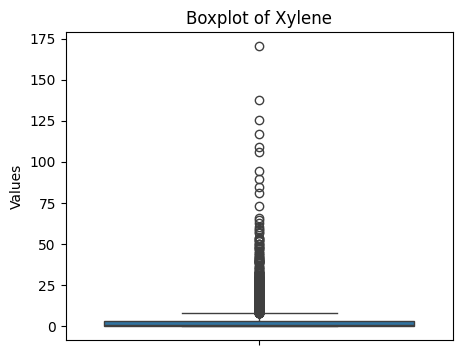

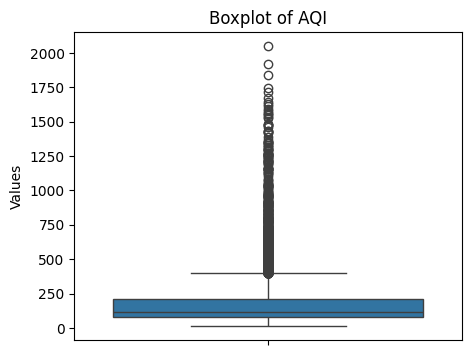

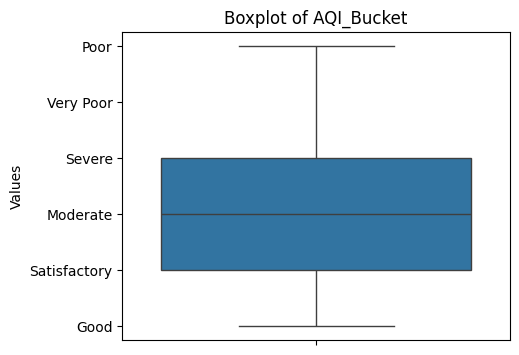

In [12]:
for col in df.columns:
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.boxplot(y=df[col], ax=ax)
    plt.title(f"Boxplot of {col}")
    plt.ylabel("Values")
    plt.show()

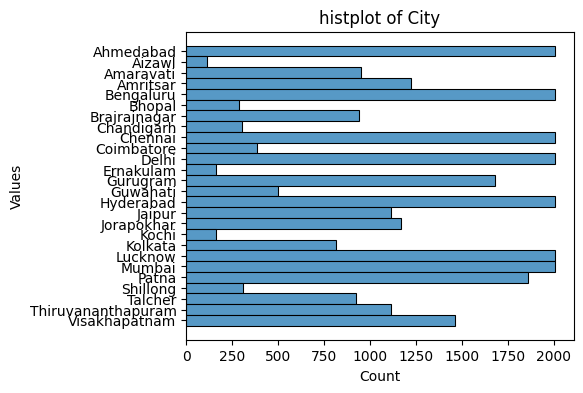

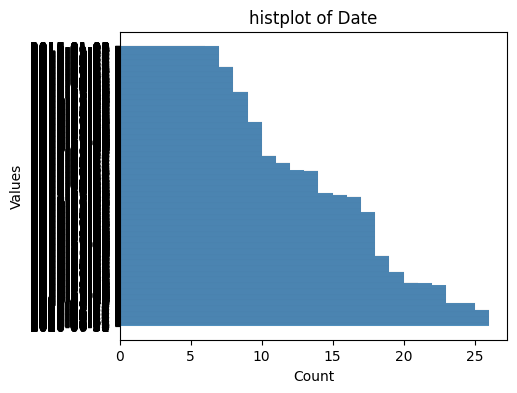

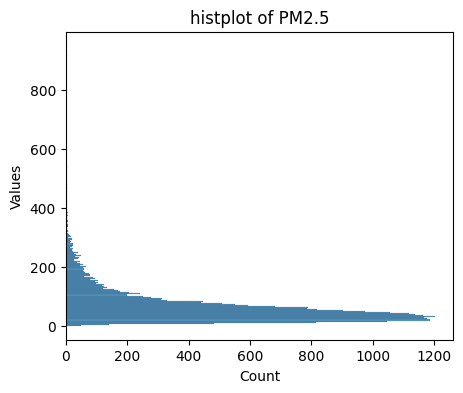

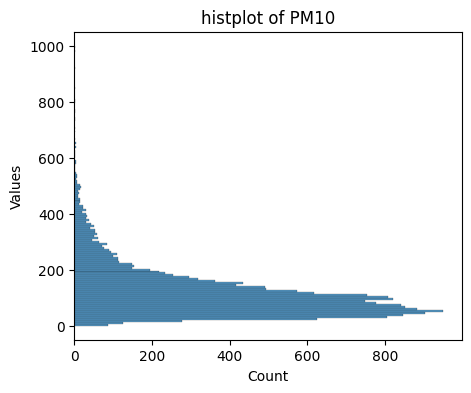

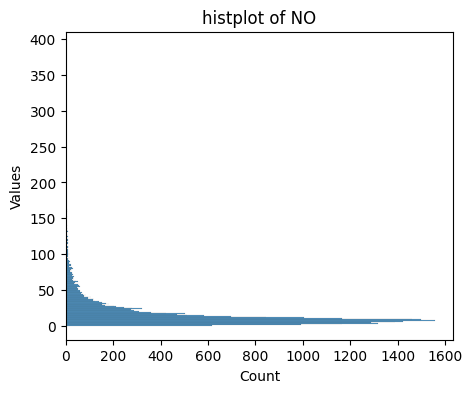

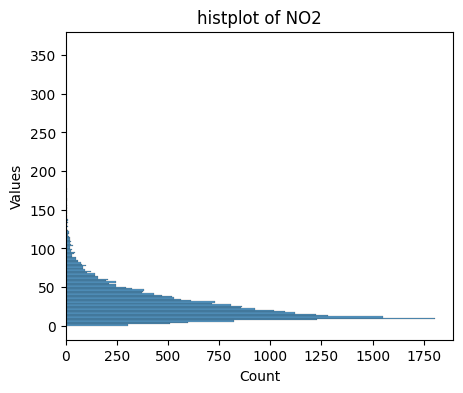

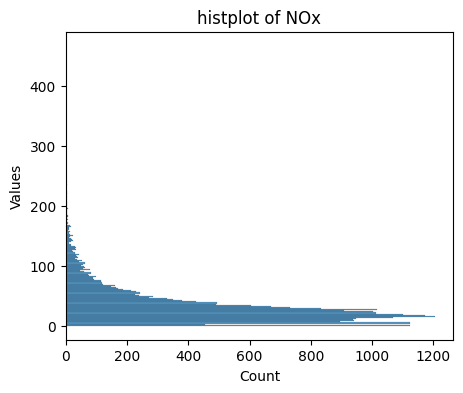

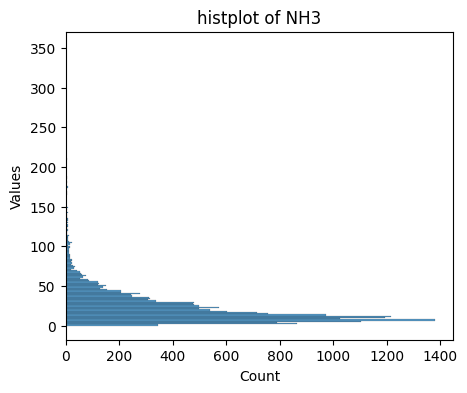

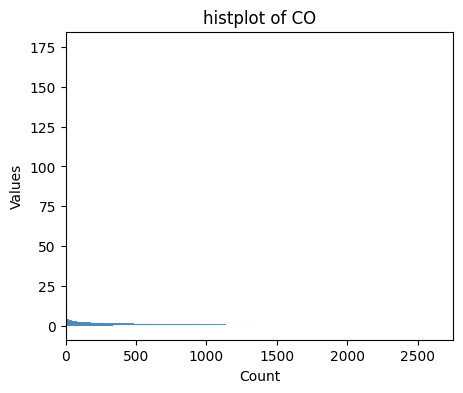

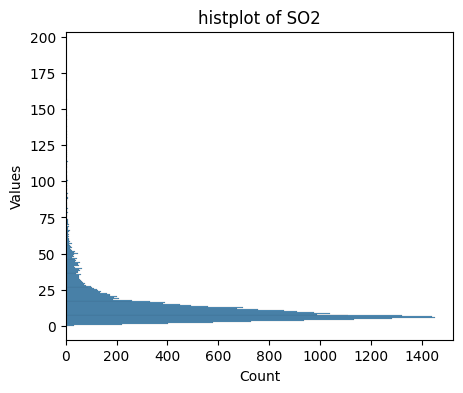

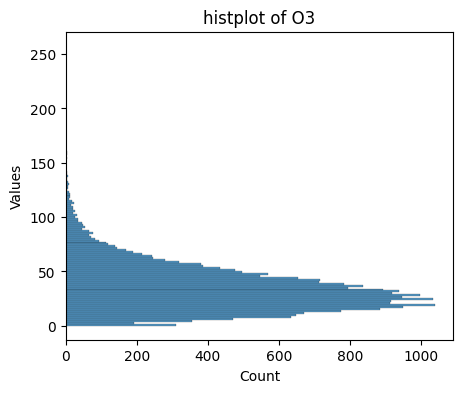

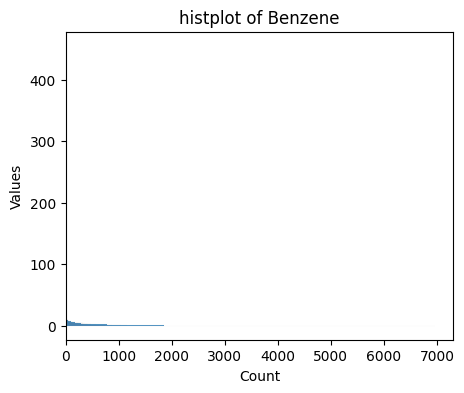

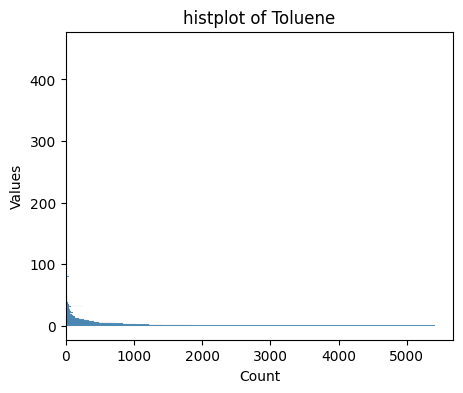

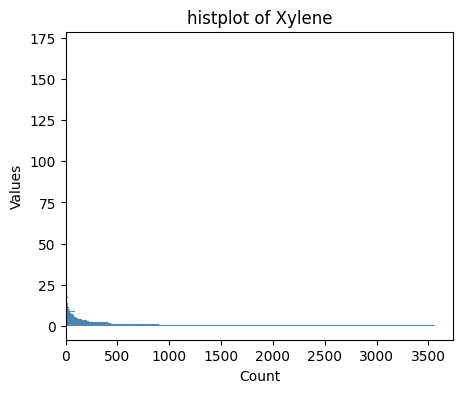

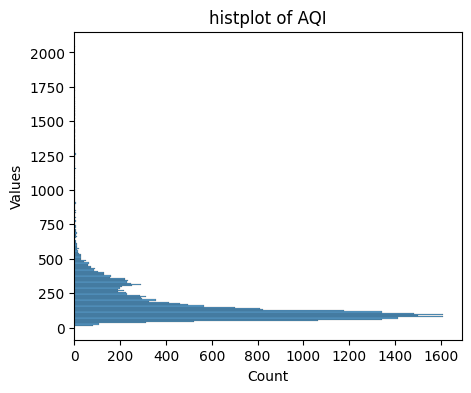

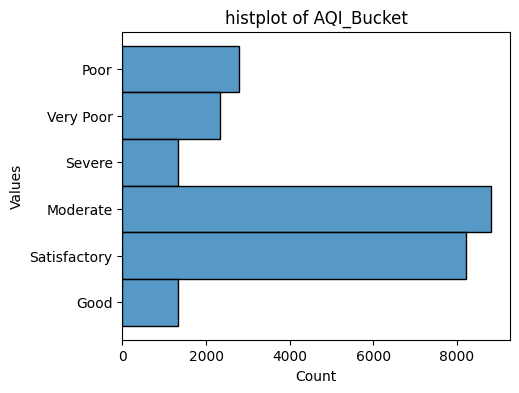

In [13]:
for col in df.columns:
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.histplot(y=df[col], ax=ax)
    plt.title(f"histplot of {col}")
    plt.ylabel("Values")
    plt.show()

In [14]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['City']=le.fit_transform(df['City'])

In [16]:
df['City'] = np.log1p(df['City'])
df['PM2.5'] = np.log1p(df['PM2.5'])
df['PM10'] = np.log1p(df['PM10'])
df['NO'] = np.log1p(df['NO'])
df['NO2'] = np.log1p(df['NO2'])
df['NOx'] = np.log1p(df['NOx'])
df['NH3'] = np.log1p(df['NH3'])
df['CO'] = np.log1p(df['CO'])
df['SO2'] = np.log1p(df['SO2'])
df['O3'] = np.log1p(df['O3'])
df['Benzene'] = np.log1p(df['Benzene'])
df['Toluene'] = np.log1p(df['Toluene'])
df['AQI'] = np.log1p(df['AQI'])

# Data cleaning

In [17]:
df["Date"]=pd.to_datetime(df['Date'])

In [18]:
df.drop(columns=['Xylene','AQI_Bucket'],inplace=True)  #DROP Xylene COLUMN, DROP AQI_Bucket COLUMN

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   City     29531 non-null  float64       
 1   Date     29531 non-null  datetime64[ns]
 2   PM2.5    24933 non-null  float64       
 3   PM10     18391 non-null  float64       
 4   NO       25949 non-null  float64       
 5   NO2      25946 non-null  float64       
 6   NOx      25346 non-null  float64       
 7   NH3      19203 non-null  float64       
 8   CO       27472 non-null  float64       
 9   SO2      25677 non-null  float64       
 10  O3       25509 non-null  float64       
 11  Benzene  23908 non-null  float64       
 12  Toluene  21490 non-null  float64       
 13  AQI      24850 non-null  float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 3.2 MB


In [20]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI'],
      dtype='object')

In [21]:
# filling missing  values

df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
df["PM10"].fillna(df["PM10"].median(),inplace=True)
df["NO"].fillna(df["NO"].median(),inplace=True)
df["NO2"].fillna(df["NO2"].median(),inplace=True)
df["NOx"].fillna(df["NOx"].median(),inplace=True)
df["NH3"].fillna(df["NH3"].median(),inplace=True)
df["CO"].fillna(df["CO"].median(),inplace=True)
df["SO2"].fillna(df["SO2"].median(),inplace=True)
df["O3"].fillna(df["O3"].median(),inplace=True)
df["Benzene"].fillna(df["Benzene"].median(),inplace=True)
df["Toluene"].fillna(df["Toluene"].median(),inplace=True)
df["AQI"].fillna(df["AQI"].median(),inplace=True)

<ipython-input-21-6cc77f38a71f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
<ipython-input-21-6cc77f38a71f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

# Feature Engineering

In [22]:
# Convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year
df['Year'] = df['Date'].dt.year

# Extract the month
df['Month'] = df['Date'].dt.month

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['Day_Of_Week'] = df['Date'].dt.dayofweek

# droping previous column
df.drop("Date", axis=1, inplace=True)

In [23]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,Day_Of_Week
0,0.000000,3.903386,4.571407,0.652325,2.955951,2.898671,2.824351,0.652325,3.354804,4.900523,0.000000,0.019803,4.779123,2015,1,3
1,0.000000,3.903386,4.571407,0.678034,2.814810,2.859913,2.824351,0.678034,3.240637,3.557061,1.543298,1.871802,4.779123,2015,1,4
2,0.000000,3.903386,4.571407,2.912351,3.010621,3.424263,2.824351,2.912351,3.403528,3.456317,2.054124,2.856470,4.779123,2015,1,5
3,0.000000,3.903386,4.571407,0.993252,2.969388,2.942859,2.824351,0.993252,2.975019,3.613078,1.691939,2.410542,4.779123,2015,1,6
4,0.000000,3.903386,4.571407,3.139833,3.109953,3.657389,2.824351,3.139833,3.697096,3.696600,2.080691,2.990217,4.779123,2015,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,3.258097,2.773838,3.950089,2.161022,3.260402,3.022374,2.600465,0.385262,2.256541,3.190476,1.175573,2.570320,3.737670,2020,6,5
29527,3.258097,3.233961,4.318687,1.486140,3.298057,2.863914,2.564180,0.418710,2.618855,3.438493,0.553885,1.166271,4.262680,2020,6,6
29528,3.258097,3.174297,4.200655,1.492904,3.418710,2.961658,2.460443,0.392042,2.242835,3.464485,0.009950,0.009950,4.234107,2020,6,0
29529,3.258097,2.870169,3.931237,1.619388,3.409827,2.985682,2.400619,0.418710,2.383243,3.377588,0.000000,0.000000,4.007333,2020,6,1


# Correlation

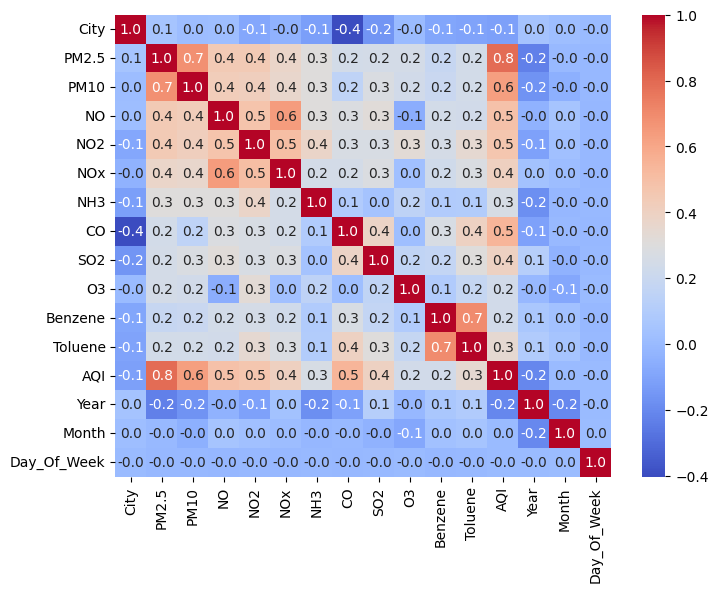

In [24]:
cor=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True,cmap='coolwarm',fmt='0.01f')
plt.show()

In [25]:
s=df.corr()['AQI']
s.sort_values(ascending=False)

,AQI
AQI,1.000000
PM2.5,0.791353
PM10,0.630454
CO,0.542678
NO,0.488596
NO2,0.466398
NOx,0.405340
SO2,0.401969
Toluene,0.347745
NH3,0.262280


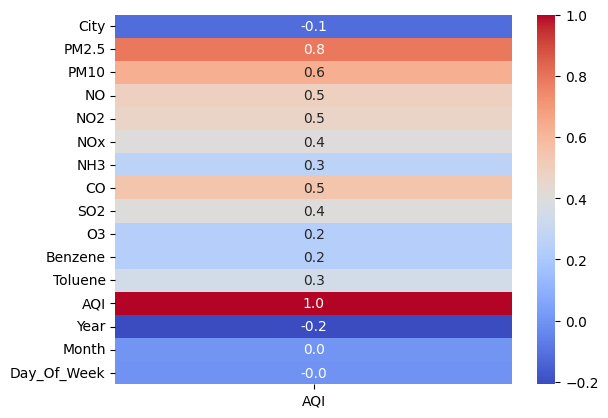

In [26]:
sns.heatmap(s.to_frame(),annot=True,cmap='coolwarm',fmt='0.01f')
plt.show()

# Outlier detection

# Initial Modeling

In [29]:
# ,'Benzene', 'Toluene' ,'NOx', 'SO2'

In [47]:
x = df[['PM2.5', 'PM10', 'NO', 'NO2', 'CO']]
y = df["AQI"]

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [49]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [50]:
ypred=model.predict(x_test)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse = mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ypred)
mae=mean_absolute_error(y_test, ypred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2},MAE:{mae}")

MSE: 0.08006919445936506, RMSE: 0.28296500571513267, R-squared: 0.7804700480691757,MAE:0.20876486603658728


# Another method  on dfa

In [35]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)
from sklearn.preprocessing import StandardScaler

In [52]:
x = df[['PM2.5', 'PM10', 'NO', 'NO2', 'CO']]
y = df["AQI"]  # Target variable

In [53]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
x_train

,PM2.5,PM10,NO,NO2,CO
6688,4.964731,5.535324,2.896464,3.550192,1.678964
29333,4.338728,4.811696,1.373716,3.333275,0.751416
27996,2.773214,3.355153,1.446919,2.196113,0.392042
26848,3.903386,4.571407,2.387845,3.121924,0.636577
21186,2.871302,4.571407,2.132982,3.367296,0.598837
...,...,...,...,...,...
21575,3.124565,4.571407,2.193886,2.977568,0.647103
5390,3.665099,4.324662,2.389680,3.766535,0.712950
860,3.903386,4.571407,2.387845,3.121924,0.636577
15795,3.613078,4.572854,1.897620,3.472277,0.530628


In [55]:
y_train

,AQI
6688,5.786897
29333,4.859812
27996,3.850148
26848,4.779123
21186,4.248495
...,...
21575,4.262680
5390,4.304065
860,4.779123
15795,4.624973


In [56]:
# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [57]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [58]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [59]:
# Dictionary to store the results
results = {}

In [60]:
# Apply each model and compute metrics
for name, model in models.items():
  if name in ["Support Vector Regressor", "Neural Network"]:
        # Apply scaling for models that need it
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
  else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

In [61]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²
Linear Regression         0.209651  0.285881  0.774006
Ridge Regression          0.209653  0.285881  0.774006
Lasso Regression          0.453991  0.601499 -0.000450
ElasticNet Regression     0.453991  0.601499 -0.000450
Decision Tree             0.187458  0.297526  0.755221
Random Forest             0.138703  0.219170  0.867173
Gradient Boosting         0.152666  0.228888  0.855132
Support Vector Regressor  0.152868  0.228453  0.855682
K-Nearest Neighbors       0.148677  0.232638  0.850346
Neural Network            0.156411  0.230476  0.853115
